# Giới thiệu

### Tổng quan

Chào mừng đã đến bài lab đầu tiên trong Khóa học VietAI. Lần này bạn sẽ học cách tương tác với hai thư viện được biết đến nhiều nhất - Numpy và TensorFlow. Bài toán chúng ta sẽ giải quyết trong buổi hôm nay là linear regression.

Trong lớp thí điểm này, các bài tập sẽ được áp dụng từ chương trình mở về khóa học sâu từ các trường đại học và nhiều nguồn mở khác.
 
### Mục tiêu học tập

* Hiểu thêm về cách hoạt động của Numpy và Tensorflow 
* Có thể viết một thuật toán đơn giản (và debug) với `Tensorflow` và `Numpy` qua ví dụ về hồi quy tuyến tính.
* Hiểu thêm về hồi quy tuyến tính.

# Giới thiệu

Bài toán lần này, chúng ta sẽ cùng nhau dự đoán giá nhà tại một thành phố Boston ở Mỹ với kích thước mẫu với 506 giá trị với 13 thuộc tính như sau

```
- CRIM per capita crime rate by town
- ZN proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS proportion of non-retail business acres per town
- CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX nitric oxides concentration (parts per 10 million)
- RM average number of rooms per dwelling
- AGE proportion of owner-occupied units built prior to 1940
- DIS weighted distances to five Boston employment centres
- RAD index of accessibility to radial highways
- TAX full-value property-tax rate per $10,000
- PTRATIO pupil-teacher ratio by town
- B 1000(Bk - 0.63)ˆ2 where Bk is the proportion of blacks by town
- LSTAT % lower status of the population
- MEDV Median value of owner-occupied homes in $1000's
```

Với thông tin này, ta sẽ cùng nhau tiến hành xây dựng một hàm giả thuyết theo mô hình hồi quy tuyến tính dựa trên `numpy` và `tensorflow` để đưa ra giá nhà dựa trên ít nhất là 2 thuộc tính.

### I/ Tìm nghiệm bài toán Linear Regression bằng `Numpy`

#### Nhập thư viện

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Đọc dữ liệu

In [26]:
from utils_function import load_Boston_housing_data

train_X, test_X, train_Y, test_Y = load_Boston_housing_data(feature_ind = [2,5])

Selected original features are ['INDUS' 'RM']


Vừa rồi, ta vừa mới tải tập dữ liệu xuống và chiết ra thành 4 tập. 

Trong đó, `train_X` và `train_Y` được dùng để xây dựng mô hình. Còn `test_X`, `test_Y` được giữ lại và chỉ được dùng để đánh giá độ tốt của mô hình ở phút cuối. 

Tỉ lệ được chia ra giữa các phần xây dựng và kiểm chứng là 1:4 Sau này, chúng ta sẽ học kỹ hơn về phần này nên phần đánh giá độ tốt của mô hình mình chỉ dừng lại ở mức là thực thi câu hàm đánh giá.

Để đơn giản, dữ liệu được lấy vào chỉ gồm 2 đặc tính

```
    - INDUS proportion of non-retail business acres per town
    - RM average number of rooms per dwelling
```

Tạm dịch

```
    - INDUS: tỷ lệ diện tích không dùng cho kinh doanh bán lẻ mỗi thị trấn
    - RM: số phòng trung bình mỗi căn hộ/ nhà
```

Bạn có thể lấy thêm các đặc tính khác qua việc thiết lập lại hàm `load_data` như sau

In [3]:
load_Boston_housing_data?

Để hiểu thêm về tập dữ liệu ta có thể làm thêm một số minh họa như sau

#### Minh họa dữ liệu

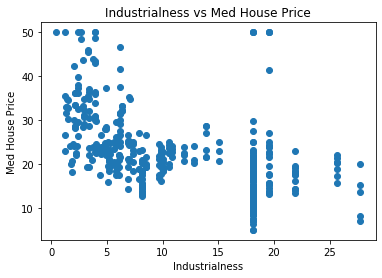

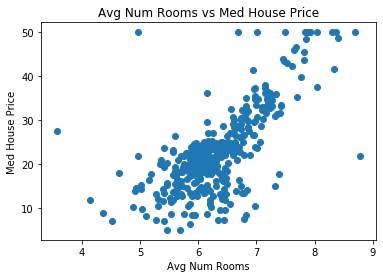

In [4]:
from utils_function import scatter_plot

scatter_plot(train_X[:, 0], train_Y,\
            title="Industrialness vs Med House Price",\
            x_label = "Industrialness",\
            y_label = "Med House Price")


scatter_plot(train_X[:, 1], train_Y,\
            title="Avg Num Rooms vs Med House Price",\
            x_label = "Avg Num Rooms",\
            y_label = "Med House Price")

Hiên thời, vecto của ta đang có dạng như sau:

In [5]:
print("Size of data X train matrix %s"  % str(train_X.shape))
print("Size of data Y train array %s"  % str(train_Y.shape))
print("Size of data X test matrix %s"  % str(test_X.shape))
print("Size of data Y test array %s"  % str(test_Y.shape))

Size of data X train matrix (404, 2)
Size of data Y train array (404,)
Size of data X test matrix (102, 2)
Size of data Y test array (102,)


#### Bài 1. Viết hàm cost function
Nhắc lại, từ công thức tính **mean squared error**, ta có:
$$\mathcal{E}(\hat{y}, y) = \frac{1}{2N} \sum_{i=1}^N (\hat{y}^{(i)}-y^{(i)})^2 $$
Khai triển, kết quả có là
$$\mathcal{E}(\hat{y}, y) = \frac{1}{2N} \sum_{i=1}^N (w_1 x_1^{(i)} + w_2 x_2^{(i)} + b - y^{(i)})^2 $$

#### 1.1. Viết chương trình

In [6]:
def np_cost(w, b, X, y):
    '''
    Evaluate the cost function in a non-vectorized manner for 
    inputs `X` and targets `y`, at weights `w` and `b`.
    
    X: 2D array dataset that has (N, d) dimension. 
    y: list of targets that has (N, 1) dimension.
    w: list of weights that has (d, 1) dimension
    b: a scalar bias.
    
    Return a scalar cost value of `w`, `b`.
    '''
    
    costs = 0
    N = len(y)
    for i in range(len(y)):
        
        # TODO: complete below expression to calculate cost function
#         y_hat = None # hypothesis
        y_hat = np.dot(X[i], w) + b
        costs += (y_hat - y[i])**2 # sum cost of each data point.
        
    return costs / (2 * N)

#### 1.2 Chạy thử chương trình 

In [7]:
# print(train_X[0])
# np.dot(train_X[0], [3, 5])
np_cost([3, 5], 20, train_X, train_Y) # 2256.1627893564355

2256.1627893564355

In [8]:
np_cost([3, 5], 0, train_X, train_Y) # 1210.8142745049508

1210.8142745049508

#### Bài 2. Vector hóa hàm cost

Ngoài ra, ta còn có thể viết lại công thức trên như sau:

$$\mathcal{E}(\hat{y}, y) = \frac{1}{2N} \| \bf{X} \bf{w} + b \mathbb{1} - \bf{y} \| ^2$$ 

#### 2.1 Viết chương trình

In [9]:
def np_cost_vectorized(w, b, X, y):
    '''
    Evaluate the cost function in a vectorized manner for 
    inputs `X` and targets `t`, at weights `w` and `b`.
    
    X: dataset matrix has (N, d) dimension. 
    y: targets vector has (N, 1) dimension.
    w: weights vector has (d, 1) dimension
    b: a scalar bias.
    
    Return a scalar cost value of `w`, `b`.
    '''
    
    #TODO: Complete the following expression
    N = y.shape[0] # number of dataset
    w = np.asarray(w) # convert to numpy array
    y_hat = np.dot(X, w) + b # hypothesis
    
    return np.sum((y_hat - y)**2) / (2.0 * N)

#### 2.2 Chạy thử chương trình

In [10]:
# np.asarray([3, 5])
np_cost_vectorized([3, 5], 20, train_X, train_Y) # 2256.1627893564355

2256.1627893564355

In [11]:
np_cost_vectorized([3, 5], 0, train_X, train_Y) # 1210.8142745049508

1210.8142745049504

### Tìm nghiệm chính xác

#### Bài 3. Tính nghiệm chính xác

Để chuyển qua phép tính ma trận có dạng như sau $X *w + b$ ta cần bổ sung thêm một chiều cho hệ số tự do ở phần cuối của mỗi dòng trong ma trận. 

**Ví dụ** Lấy dòng đầu tiên của ma trận hiện thời, ta có: `array([ 6.2  ,  6.951 ])`   $\,\to\,$  `array([ 6.2  ,  6.951,  1.   ])`

#### 3. 1 Tái tạo vecto cho tập train

In [12]:
# TODO: Add one at the end of each row in train_X by np.concatenate
ones = np.ones((train_X.shape[0], 1))
train_X_new = np.concatenate((train_X, ones), axis = 1)
train_X_new


array([[ 6.2  ,  6.951,  1.   ],
       [10.81 ,  5.961,  1.   ],
       [ 4.93 ,  6.897,  1.   ],
       ...,
       [10.01 ,  6.021,  1.   ],
       [ 6.91 ,  6.03 ,  1.   ],
       [ 4.05 ,  5.572,  1.   ]])

In [13]:
train_X_new[0]

array([6.2  , 6.951, 1.   ])

#### 3.2 Viết chương trình tính nghiệm
 
$$\theta = \left(X^{\rm T}X\right)^{-1} \left(X^{\rm T}y \right) =  A * c $$

In [14]:
def np_solve_exactly(X, y):
    '''
    Solve linear regression exactly. (fully vectorized)
    
    Given `X` - NxD matrix of inputs
          `t` - target outputs
    Return the optimal weights as a D-dimensional vector

    '''
    
    #TODO: Complete the below followed the above expressions
    A = np.dot(X.T, X)
    c = np.dot(X.T, y)
    
    return np.dot(np.linalg.inv(A), c)

#### 3.3 Chạy thử chương trình

In [15]:
# X = train_X_new
# np.dot(X.T, X)
opt_w_exactly = np_solve_exactly(train_X_new, train_Y)
print("W:",opt_w_exactly) # [ -0.37785864   7.83254633 -22.54414787]
print("Cost:", np_cost_vectorized(opt_w_exactly[:2], opt_w_exactly[2], train_X, train_Y)) # 18.501517485624333

W: [ -0.37785864   7.83254633 -22.54414787]
Cost: 18.501517485624333


### Tìm nghiệm xấp xỉ bằng `Numpy`


#### Bài 4. Véc-tơ hóa hàm tính grad

Với $i = 1...m $ và $j = 1...n$ xét

$$ \frac{\partial \mathcal{E}}{\partial w_j} = \frac{1}{N}\sum_i x_j^{(i)}(\hat{y}^{(i)}-y^{(i)}) $$



#### 4.1 Viết chương trình

In [16]:
def np_grad_fn(weights, X, y):
    '''
    Given `weights` - a current "Guess" of what our weights should be
          `X` - matrix of shape (N,D) of input features
          `t` - target y values
    Return gradient of each weight evaluated at the current value
    '''
    
    #TODO: Complete the below followed the above expressions
    N, D = X.shape
    y_hat = np.dot(X, weights)
    error = y_hat - y
    
    return np.dot(np.transpose(X), error) / float(N)



In [17]:
N, D = train_X_new.shape
N

404

#### Bài  5. Tính dựa trên Gradient Descent

Xấp xỉ giá trị $\theta$ như sau

$$ \hat{\theta} := \hat{\theta} - \alpha * \left( h_\theta(x^{(i)}) - y^{(i)} \right)x_j^{(i)}$$

#### 5.1 Viết chương trình

In [18]:
def np_solve_via_gradient_descent(X, y, print_every=5000,
                               niter=100000, alpha=0.005):
    '''
    Given `X` - matrix of shape (N,D) of input features
          `y` - target y values
    Solves for linear regression weights.
    Return weights after `niter` iterations.
    '''
    N, D = np.shape(X)
    # initialize all the weights to zeros
    w = np.zeros([D])
    for k in range(niter):
        
        #TODO: Complete the below followed the above expressions
        dw = np_grad_fn(w, X, y)
        w = w - alpha*dw
        
        if k % print_every == 0:
            print('Weight after %d iteration: %s' % (k, str(w)))
    return w

#### 5.2 Chạy thử chương trình

In [24]:
opt_w = np_solve_via_gradient_descent(train_X_new, train_Y)

Weight after 0 iteration: [1.08841881 0.73504649 0.11305941]
Weight after 5000 iteration: [-0.52280011  5.12987932 -3.74261504]
Weight after 10000 iteration: [-0.49539334  5.64092276 -7.29776997]
Weight after 15000 iteration: [ -0.47316887   6.05533373 -10.18068575]
Weight after 20000 iteration: [ -0.4551468    6.39138431 -12.5184751 ]
Weight after 25000 iteration: [ -0.44053249   6.66389158 -14.41421522]
Weight after 30000 iteration: [ -0.42868158   6.88487083 -15.95149255]
Weight after 35000 iteration: [ -0.41907154   7.06406544 -17.19808831]
Weight after 40000 iteration: [ -0.41127866   7.20937639 -18.20896706]
Weight after 45000 iteration: [ -0.40495931   7.3272107  -19.02870019]
Weight after 50000 iteration: [ -0.39983489   7.42276389 -19.69343116]
Weight after 55000 iteration: [ -0.39567943   7.50024907 -20.2324691 ]
Weight after 60000 iteration: [ -0.39230972   7.56308268 -20.66958113]
Weight after 65000 iteration: [ -0.38957719   7.61403518 -21.02404027]
Weight after 70000 iter

In [20]:
print("Training cost:", np_cost_vectorized(opt_w[:2], opt_w[2], train_X, train_Y)) # 18.502043170574055

Training cost: 18.502043170574055


In [21]:
print("Testing cost:", np_cost_vectorized(opt_w[:2], opt_w[2], test_X, test_Y)) # 24.051240417619557

Testing cost: 24.051240417619557
